In [1]:
%cd ..

/mnt/c/Users/XCB/OneDrive - Van Oord/Documents/thesis/code


In [18]:
import matplotlib.pyplot as plt
import geopandas as gpd
import rasterio as rio
import numpy as np

In [5]:
%matplotlib widget

# reading the point locations

In [46]:
site = "stcroix"

In [47]:
# get a dataframe of all bathymetry points
all_df = gpd.read_file(f"../data/test_sites/{site}/all_bathy_pts.gpkg")
#  get a dataframe of the subsampled points
subset_df = gpd.read_file(f"../data/test_sites/{site}/kriging_pts/")

In [48]:
# convert to a numpy array
subset_pts = subset_df.drop(columns="geometry").to_records(index=False)

# reading the kriging output

In [49]:
with rio.open(f"../data/test_sites/{site}/kriging_output.tif") as krigingras:
    # the sigma is the second band
    uncertainty = krigingras.read(2)
    # the actual bathymetry estimate is the first band
    kriged_bathy = krigingras.read(1)
    height = uncertainty.shape[0]
    width = uncertainty.shape[1]
    cols, rows = np.meshgrid(np.arange(width), np.arange(height))
    xs, ys = rio.transform.xy(krigingras.transform, rows, cols)
    eastings = np.array(xs)
    northings = np.array(ys)

297616.44873801654

(-22.332722290548794, 0.0)

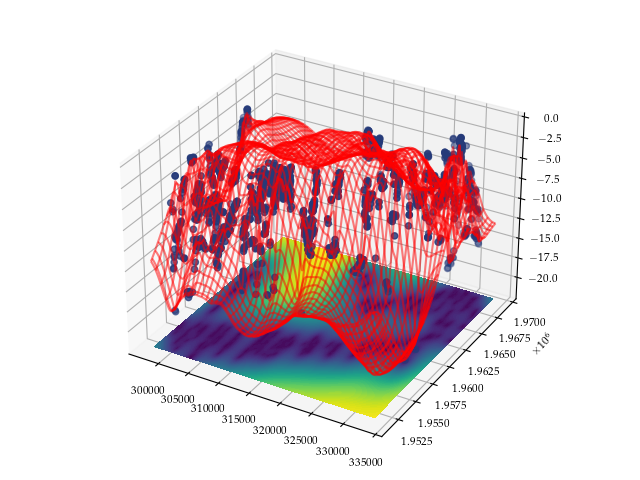

In [52]:
fig = plt.figure()
ax = plt.axes(projection="3d")

ax.scatter3D(subset_pts.X, subset_pts.Y, subset_pts.Z)
ax.plot_wireframe(eastings, northings, kriged_bathy, color="red", alpha=0.5)

# find the location of the bottom of the plot based on the minimum depth of the bathymetry points:
mindepth = subset_pts.Z.min()
ax.contourf(eastings, northings, uncertainty, 100, offset=mindepth, zdir="z")
ax.set_zlim3d(top=0, bottom=mindepth)